In [1]:
!pip install mne
import mne

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
from pylab import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
raw = mne.io.read_raw_bdf('all.bdf')


raw.info.set_montage('standard_1020')
print(raw, raw.info)

Extracting EDF parameters from /content/all.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
<RawEDF | all.bdf, 37 x 1579520 (6170.0 s), ~56 kB, data not loaded> <Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, F7, C3, T7, CP5, CP3, P5, P9, PO7, PO3, O1, Iz, POz, ...
 chs: 36 EEG, 1 Stimulus
 custom_ref_applied: False
 dig: 39 items (3 Cardinal, 36 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2023-03-07 18:20:40 UTC
 nchan: 37
 projs: []
 sfreq: 256.0 Hz
>


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


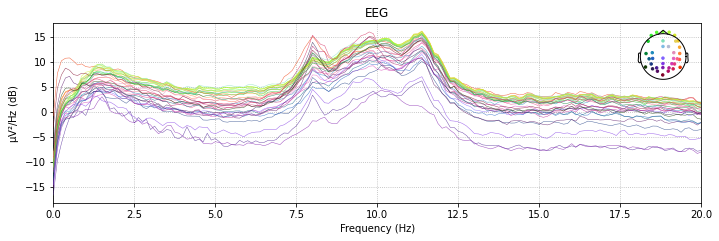

In [80]:
psd_plot = raw.plot_psd(fmax=20)
psd_plot

In [81]:
events = mne.find_events(raw)

event_id, tmin, tmax = 131071, -10, 0

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, preload=True)
epochs

Trigger channel has a non-zero initial value of 131071 (consider using initial_event=True to detect this event)
663 events found
Event IDs: [131071]
Not setting metadata
663 matching events found
Setting baseline interval to [-10.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 663 events and 2561 original time points ...
0 bad epochs dropped


Number of events,663
Events,131071: 663
Time range,-10.000 – 0.000 sec
Baseline,-10.000 – 0.000 sec


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


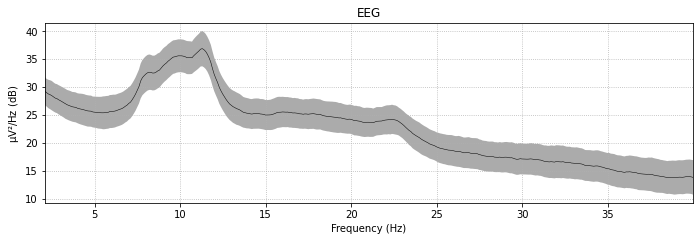

In [82]:
epochs_freq_plot = epochs.plot_psd(fmin=2., fmax=40., average=True)
epochs_freq_plot

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


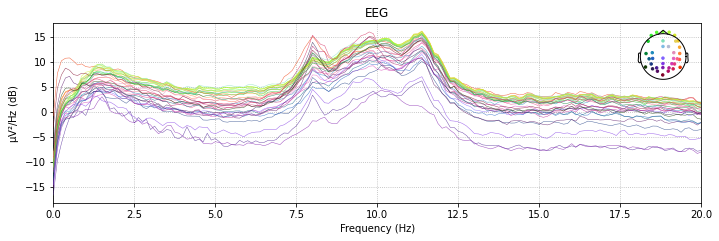

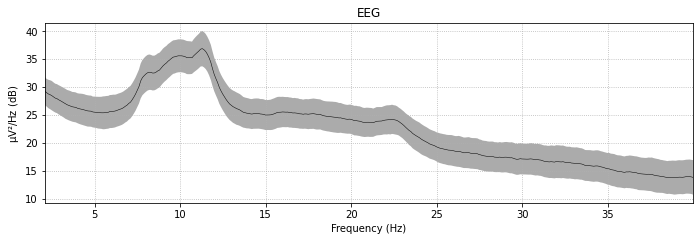

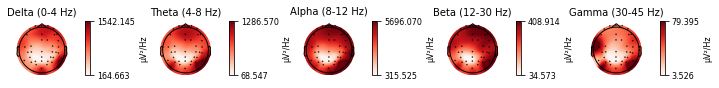

In [83]:
freq_topomaps = epochs.plot_psd_topomap(ch_type='eeg', normalize=False)

No projector specified for this dataset. Please consider the method self.add_proj.


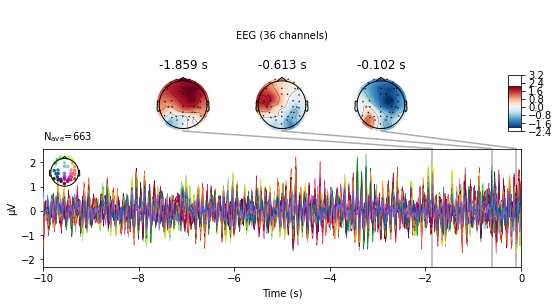

In [84]:
evoked = epochs['131071'].average()
evoked_plot = evoked.plot_joint(picks='eeg')

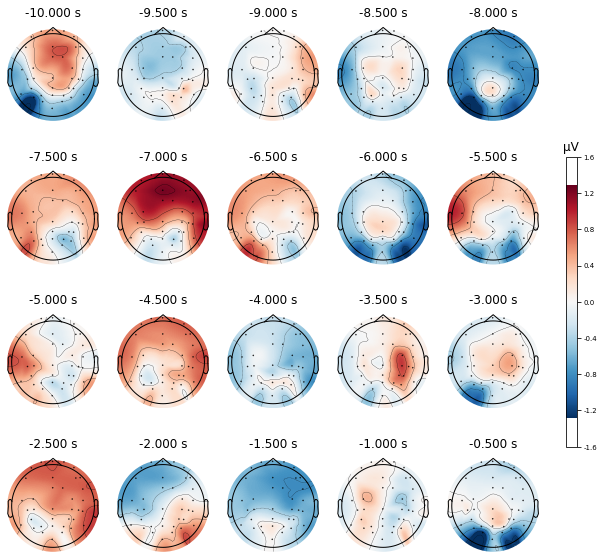

In [85]:
times = np.arange(-10, 0, 0.5)
time_segment_topomaps = evoked.plot_topomap(times, ch_type='eeg', ncols=5, nrows='auto')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.1s remaining:    0.0s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   42.8s finished


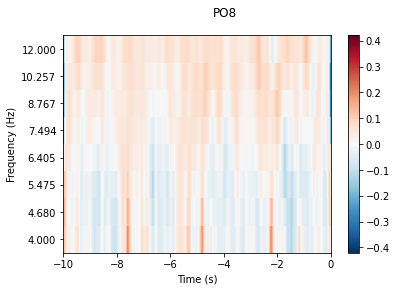

[<Figure size 432x288 with 2 Axes>]

In [86]:
frequencies = np.logspace(*np.log10([4, 12]), num=8)
cycles = frequencies / 2

power = mne.time_frequency.tfr_morlet(epochs, n_cycles=cycles, return_itc=False,freqs=frequencies, decim=3)

# Example: Channel P4 & F3
#power.plot(['P4'], baseline=(-0.5, 0), mode='logratio', title = 'P4')
power.plot(['PO8'], baseline=(-0.5, 0), mode='logratio', title = 'PO8')

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


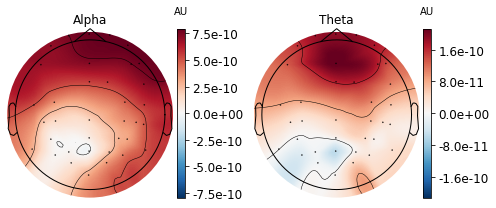

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
topomap_kw = dict(ch_type='eeg', tmin=-10, tmax=-.1, baseline=(-0.5, 0), show=False)

plot_dict = dict(Alpha=dict(fmin=8, fmax=12), Theta=dict(fmin=4, fmax=8),
                 mode='logratio', show=False)

for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
    power.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
    ax.set_title(title)

fig.tight_layout()
fig

In [88]:
# AFz, Fz, F2, F6, CP6, PO8, F8, C4